# Implement K-Means
See cluster.py

# Kmeans Performance Comparison

## 1. Test data

Test data is 700 instances of data points in 2-dimensional space, with each of the instances belonging to one of 4 clusters

In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
X, cluster_assignments = make_blobs(n_samples=700, centers=4, cluster_std=0.60, random_state=0)
df = pd.DataFrame(X)
df.columns = ['First', 'Second']
df

/var/folders/wt/s5fsq0vs4plgp1_szhmqp4s80000gn/T/ipykernel_52988/1286943690.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,First,Second
0,-0.841778,7.866552
1,-1.215153,8.014846
2,1.843208,-0.072221
3,-1.352334,7.529442
4,1.773949,-0.423201
...,...,...
695,-1.353432,3.165605
696,-0.973870,8.412865
697,-1.831415,2.286754
698,-1.846398,3.304915


The four clusters are shown in the following char.

<Axes: xlabel='First', ylabel='Second'>

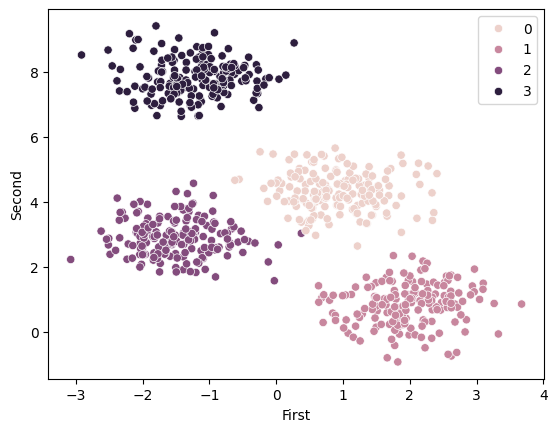

In [2]:
import seaborn as sns
sns.scatterplot(data=df, x=df.iloc[:,0], y=df.iloc[:,1], hue=cluster_assignments)

## 2. Run Kmeans 

Use X as the parameter as input to my kmeans implementation. The result is similiar to the cluster_assignments.

<Axes: xlabel='First', ylabel='Second'>

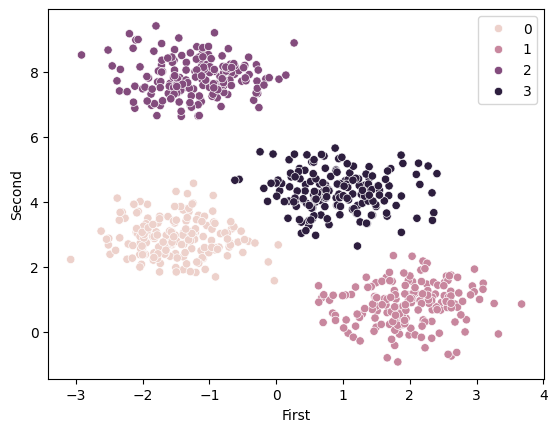

In [3]:
from cluster import cluster
my_kmeans = cluster(4,1000)
my_cluster_hypotheses, centroids = my_kmeans.fit(X)

sns.scatterplot(data=df, x=df.iloc[:,0], y=df.iloc[:,1], hue=my_cluster_hypotheses)

Use X as the parameter as input to sklearn kmeans implementation. The result is similar to the cluster_assignments.

<Axes: xlabel='First', ylabel='Second'>

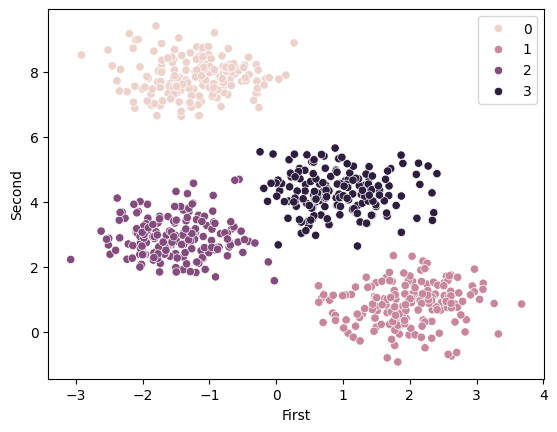

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)

ss = StandardScaler()
ss.fit(df)
x = ss.transform(df)

kmeans.fit(x)

sns.scatterplot(data=df, x=df.First, y=df.Second, hue=kmeans.labels_)

## 3. Comparisons

From my reseearch, one metrics from sklearn could identify the cluster similarity. <br>
ARI measures the similarity between two clusterings, disregarding permutations and labels. It returns a score between -1 and 1, where 1 indicates perfect similarity.<br>
Both my implementation and the sklearn implementation have a high score compare to the cluster_assignments. 

In [5]:
from sklearn.metrics import adjusted_rand_score
ari_score = adjusted_rand_score(cluster_assignments, my_cluster_hypotheses)
ari_score


0.9961850080391301

In [6]:
ari_score = adjusted_rand_score(cluster_assignments,kmeans.labels_)
ari_score

0.9848711236218626

My implementation and the sklearn implementation results also have a high similiarity. 

In [7]:
ari_score = adjusted_rand_score(kmeans.labels_, my_cluster_hypotheses)
ari_score

0.9886206113717321

We could also use a confusion matrix to see the similairity between two cluster.<br>
From this matrix we could see, my algorithm labled 1 instance diff from the cluster_assignments, labled 3 instance diff from the sklearn implementation.

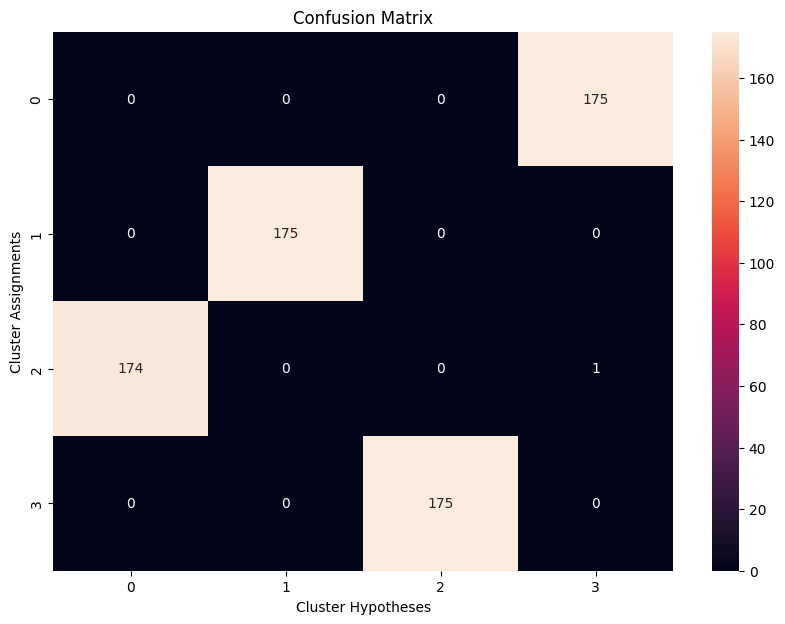

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(cluster_assignments, my_cluster_hypotheses)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Cluster Hypotheses")
plt.ylabel("Cluster Assignments")
plt.title("Confusion Matrix")
plt.show()

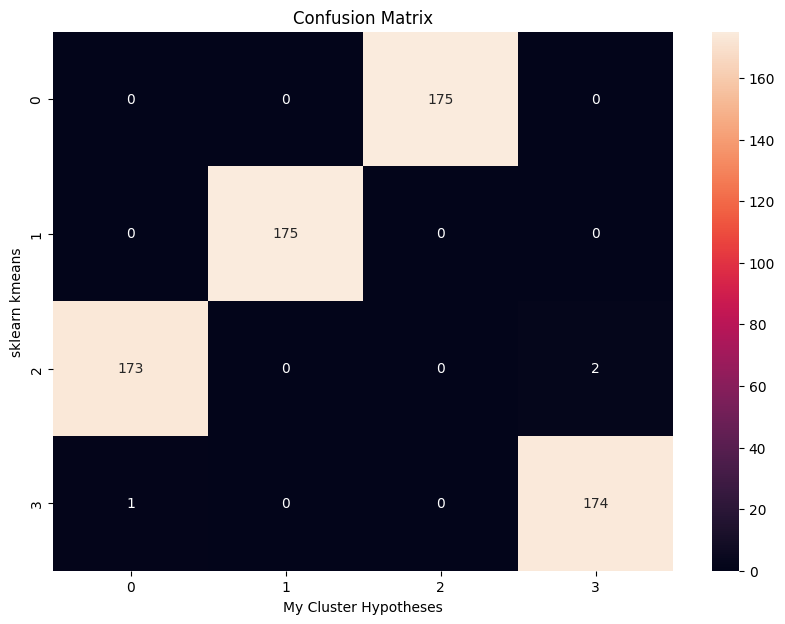

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(kmeans.labels_, my_cluster_hypotheses)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("My Cluster Hypotheses")
plt.ylabel("sklearn kmeans")
plt.title("Confusion Matrix")
plt.show()

### Notes:
If you as the grader rerun my code and find my kmeans implementation have a bad performance. that is because my initial centroids was choosed randomly, so the result could be different for every run. 

# Choose and run clustering algorithms



## 1. Taxi Dataset 

In [10]:
# Read the dataset 
df = pd.read_csv('Taxi_Trips__2013-2023_.csv')
df

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,52dc9029821e61db30a51838cb3cd711bd0e03cb,275f3f891b8c0ba8f2958873f850d2a03993c99f5f79f6...,02/01/2023 12:15:00 AM,02/01/2023 12:30:00 AM,1140.0,11.20,NaN,NaN,76.0,NaN,...,21.0,49.75,Cash,4053 - 40193 Adwar H. Nikola,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
1,11eeb6710caa0606028c7ba025bfa18c277886e8,6c87f1d023a9d7146ae81b6aa4648bf98cec52cceb9f08...,02/01/2023 12:15:00 AM,02/01/2023 12:15:00 AM,660.0,2.70,NaN,NaN,32.0,7.0,...,0.0,13.00,Credit Card,Taxi Affiliation Services,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)
2,113aa7bf346c585bb941cda2d5c0015c8a1472f0,bb4e75d3065311c33024a434640731c43fd2cf9e4482eb...,02/01/2023 12:15:00 AM,02/01/2023 12:30:00 AM,480.0,0.00,NaN,NaN,8.0,24.0,...,0.0,9.75,Credit Card,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)
3,2503e3944e5c82b89638447ad361638111129375,57c40509cae37a0e5e536a657cdb7f8c6824314bc466a7...,02/01/2023 12:15:00 AM,02/01/2023 12:45:00 AM,1620.0,0.00,1.703198e+10,NaN,76.0,NaN,...,28.0,91.00,Credit Card,Taxi Affiliation Services,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),NaN,NaN,NaN
4,23ddcfba2ad714fe0303909961ea74873be50da2,40720025b84fa778c47d6637db01b1d8f2de2eabafa529...,02/01/2023 12:15:00 AM,02/01/2023 12:15:00 AM,360.0,0.10,NaN,NaN,76.0,NaN,...,4.0,13.75,Cash,Taxi Affiliation Services,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101783,9209df4c3541198fda3173a226f2df619a806022,dee6032433df09fe8d3fd4fa958380308c902dc98f81c3...,02/07/2023 11:45:00 PM,02/07/2023 11:45:00 PM,760.0,2.69,1.703183e+10,1.703132e+10,28.0,32.0,...,0.0,10.90,Mobile,Medallion Leasin,41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
101784,f0957a8f6bef37bb2872649fb3c76ad1a179acab,3f6562a2a18861cf21a21101c14cc91dd7c4d72cdce80f...,02/07/2023 11:45:00 PM,02/07/2023 11:45:00 PM,4.0,0.00,NaN,NaN,8.0,8.0,...,0.0,77.40,Credit Card,Chicago Independents,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
101785,4cb74df671cfccceb9b592f347ef1a94c1540c7a,b31f46efa11263565e3dba91f26ff96b74516e8108ac56...,02/14/2023 10:30:00 AM,02/14/2020 06:00:00 PM,NaN,2.90,NaN,NaN,8.0,24.0,...,0.0,13.50,Cash,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)
101786,7f24c5101df65952ef318f558b8b071989ff7c17,65057dc10e707a18a32bc4371c5db0b828e90f9caf1068...,04/27/2023 11:15:00 AM,04/21/2019 09:30:00 PM,NaN,15.10,NaN,NaN,76.0,7.0,...,4.0,52.90,Credit Card,Taxi Affiliation Services,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)


In [11]:
# Use only the dropoff location to do the clustering
work_df = df[['Trip ID', 'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude']]
work_df

,Trip ID,Dropoff Centroid Latitude,Dropoff Centroid Longitude
0,52dc9029821e61db30a51838cb3cd711bd0e03cb,NaN,NaN
1,11eeb6710caa0606028c7ba025bfa18c277886e8,41.922686,-87.649489
2,113aa7bf346c585bb941cda2d5c0015c8a1472f0,41.901207,-87.676356
3,2503e3944e5c82b89638447ad361638111129375,NaN,NaN
4,23ddcfba2ad714fe0303909961ea74873be50da2,NaN,NaN
...,...,...,...
101783,9209df4c3541198fda3173a226f2df619a806022,41.884987,-87.620993
101784,f0957a8f6bef37bb2872649fb3c76ad1a179acab,41.899602,-87.633308
101785,4cb74df671cfccceb9b592f347ef1a94c1540c7a,41.901207,-87.676356
101786,7f24c5101df65952ef318f558b8b071989ff7c17,41.922686,-87.649489


In [12]:
work_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101788 entries, 0 to 101787
Data columns (total 3 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Trip ID                     101788 non-null  object 
 1   Dropoff Centroid Latitude   92489 non-null   float64
 2   Dropoff Centroid Longitude  92489 non-null   float64
dtypes: float64(2), object(1)
memory usage: 2.3+ MB


In [13]:
# Remove rows with no location info 
work_df = work_df.dropna()
work_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92489 entries, 1 to 101786
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Trip ID                     92489 non-null  object 
 1   Dropoff Centroid Latitude   92489 non-null  float64
 2   Dropoff Centroid Longitude  92489 non-null  float64
dtypes: float64(2), object(1)
memory usage: 2.8+ MB


<Axes: xlabel='Dropoff Centroid Longitude', ylabel='Dropoff Centroid Latitude'>

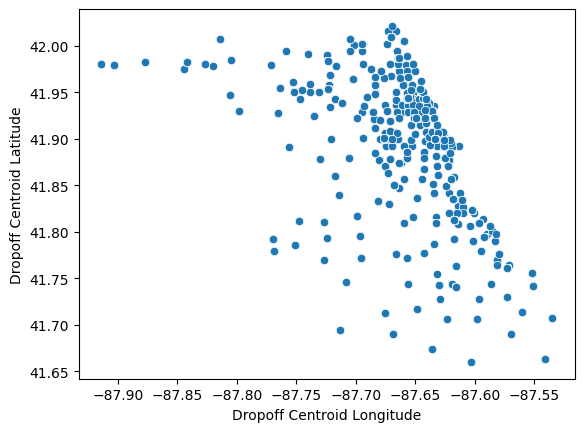

In [14]:
# An overview of data
sns.scatterplot(data=df, x=df['Dropoff Centroid Longitude'], y=df['Dropoff Centroid Latitude'])

In [15]:
# Standardize data 
kmeans = KMeans(n_clusters=4)

ss = StandardScaler()
ss.fit(work_df.iloc[:,1:])
x = ss.transform(work_df.iloc[:,1:])



<Axes: xlabel='Dropoff Centroid Longitude', ylabel='Dropoff Centroid Latitude'>

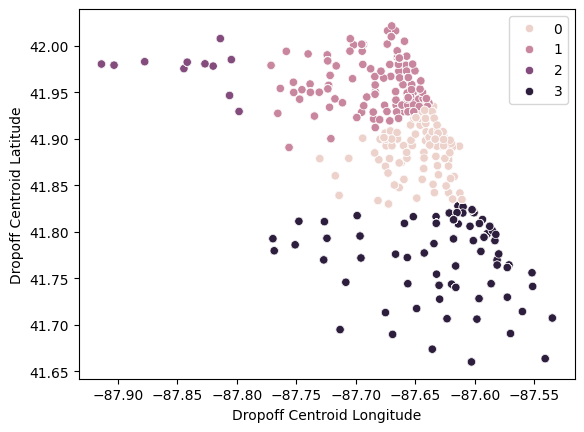

In [16]:
# Cluster use kmeans
kmeans.fit(x)

sns.scatterplot(data=work_df, x=work_df['Dropoff Centroid Longitude'], y=work_df['Dropoff Centroid Latitude'], hue=kmeans.labels_)

In [17]:
# Performance metrics for Kmeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate the Silhouette Score
silhouette = silhouette_score(x, kmeans.labels_)

# Calculate the Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(x, kmeans.labels_)

# Calculate the Variance Ratio Criterion (Calinski-Harabasz Index)
calinski_harabasz = calinski_harabasz_score(x, kmeans.labels_)

print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Silhouette Score: 0.6024185704405438
Davies-Bouldin Index: 0.5747933593228247
Calinski-Harabasz Index: 147782.35513485095


<Axes: >

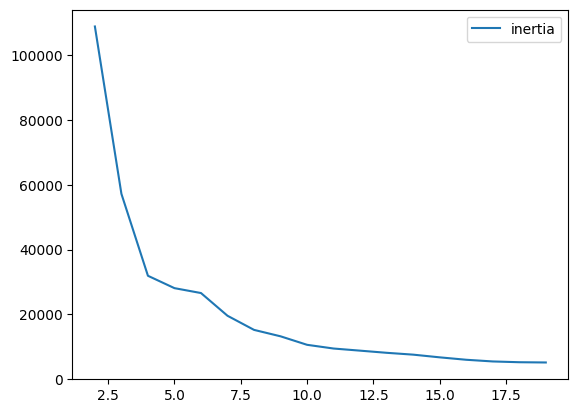

In [18]:
inertias = pd.DataFrame(data=[], index=range(2, 20), columns=['inertia'])

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    inertias.loc[k] = kmeans.inertia_
    
inertias.plot()

<Axes: xlabel='Dropoff Centroid Longitude', ylabel='Dropoff Centroid Latitude'>

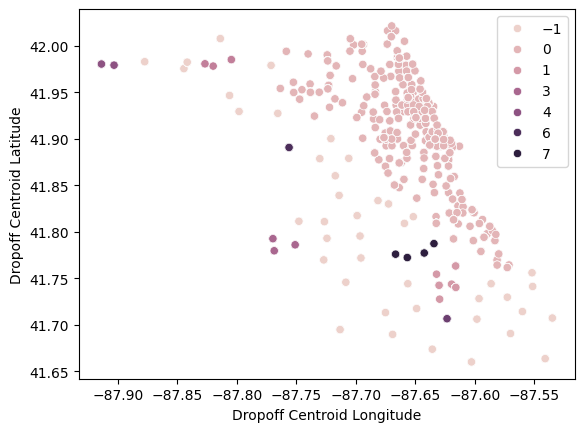

In [19]:
# Cluster use DBSCAN

from sklearn.cluster import DBSCAN
max_dist = 0.3
hoodsize= 300
cluster = DBSCAN(eps=max_dist, min_samples=hoodsize)
cluster.fit(x)

sns.scatterplot(data=work_df, x=work_df['Dropoff Centroid Longitude'], y=work_df['Dropoff Centroid Latitude'], hue=cluster.labels_)

In [20]:
# Performance metrics for DBSCAN

x_no_outliers = [x[i] for i in range(len(x)) if cluster.labels_[i]!=-1]
lables_no_outlier = [l for l in cluster.labels_ if l !=-1]

# Calculate the Silhouette Score
silhouette = silhouette_score(x_no_outliers, lables_no_outlier)

# Calculate the Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(x_no_outliers, lables_no_outlier)

# Calculate the Variance Ratio Criterion (Calinski-Harabasz Index)
calinski_harabasz = calinski_harabasz_score(x_no_outliers, lables_no_outlier)

print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Silhouette Score: 0.46173002474215424
Davies-Bouldin Index: 0.34363832932784133
Calinski-Harabasz Index: 20662.72684137809


#### Performance metrics
* Silhouette Score: The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score is higher for Kmeans indicate a good cluster.

* Davies-Bouldin Index: The Davies-Bouldin index measures the average similarity between each cluster and its most similar cluster. A lower Davies-Bouldin index indicates better clustering. The index is lower for DBSCAN, indicate a good cluster.  

* Calinski-Harabasz Index (Variance Ratio Criterion): The Calinski-Harabasz index is the ratio of the between-cluster dispersion and the within-cluster dispersion. The index is higher for Kmeans indicate a good cluster.

#### Question and Answers:
1. The reason why you chose the clustering algorithm(s): 
* I choose the Kmeans because it is the common algorithm that is fast and efficient for large datasets. 
* I choose the DBSCAN because it can identify clusters of arbitrary shapes and insensitive to outliers.
2. Any pre-processing of the data or any hyperparameter settings
* First, I pick the two feature I need from the original df. Then, I use StandardScaler to standardize data before fit. 
* For Kmeans, I choose my k parameter using the elbow method. 
* For DBSCAN, I choose my eps by trying. Ideal eps is difficult to get right.
3. Output from the algorithm(s) -- show what clusters were generated
* Please see the figures above.  
4. The metrics you used to evaluate the output. What kind of performance did you get from that algorithm? Is that what you expected
* The performance metrics was showed above, it is not same as my expactation. 
* Since DBSCAN handle outlier better, so I expect DBSCAN out perform kmeans in this dataset, but the result I get from performance metrics indicate Kmeans is better. I guess that is because the shape of the clusters. 

## 1. Mopsi Dataset

In [21]:
# Read data
df = pd.read_csv('MopsiLocationsUntil2012-Finland.txt', sep="\t", header=None)
df.columns = ["x", "y"]
df

,x,y
0,625983,297439
1,626146,297440
2,626144,297456
3,626004,297394
4,626018,297437
...,...,...
13462,626042,297444
13463,625977,297443
13464,626050,297404
13465,625995,297426


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13467 entries, 0 to 13466
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       13467 non-null  int64
 1   y       13467 non-null  int64
dtypes: int64(2)
memory usage: 210.5 KB


<Axes: xlabel='x', ylabel='y'>

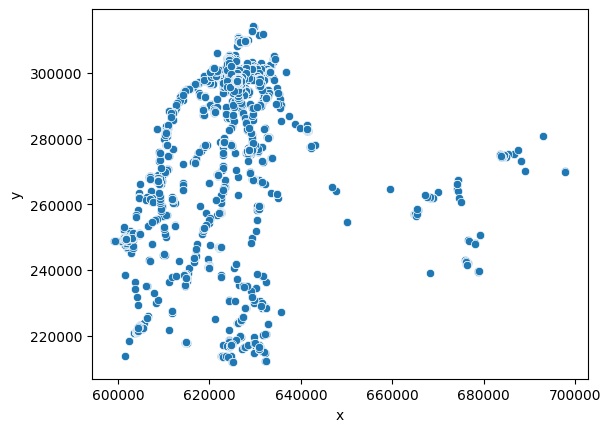

In [23]:
# Overview of data
sns.scatterplot(data=df, x=df.x, y=df.y)

<Axes: xlabel='x', ylabel='y'>

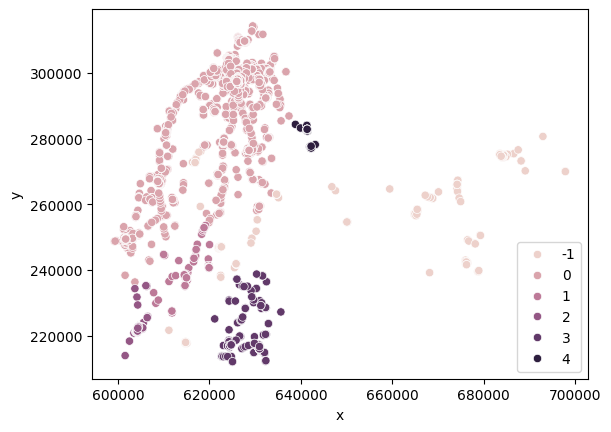

In [24]:
# Standardize data 
ss = StandardScaler()
ss.fit(df)
x = ss.transform(df)

# Cluster use DBSCAN
max_dist = 0.5
hoodsize= 100
cluster = DBSCAN(eps=max_dist, min_samples=hoodsize)
cluster.fit(x)

sns.scatterplot(data=df, x=df.x, y=df.y, hue=cluster.labels_)

In [25]:
# Cluster performance of DBSCAN
x_no_outliers = [x[i] for i in range(len(x)) if cluster.labels_[i]!=-1]
lables_no_outlier = [l for l in cluster.labels_ if l !=-1]

# Calculate the Silhouette Score
silhouette = silhouette_score(x_no_outliers, lables_no_outlier)

# Calculate the Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(x_no_outliers, lables_no_outlier)

# Calculate the Variance Ratio Criterion (Calinski-Harabasz Index)
calinski_harabasz = calinski_harabasz_score(x_no_outliers, lables_no_outlier)

print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Silhouette Score: 0.6626538343083446
Davies-Bouldin Index: 0.3059872732476123
Calinski-Harabasz Index: 3629.170332022678


<Axes: xlabel='x', ylabel='y'>

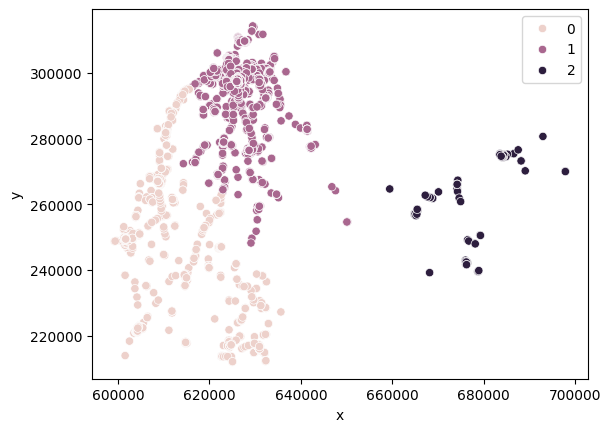

In [26]:
# Cluster use Hierarchical
from sklearn.cluster import AgglomerativeClustering
k = 3 # ... default is 2
metric = 'euclidean' # ... also: l1, l2, manhattan, cosine...
linkage = 'ward' # ... or: average, complete, maximum, single(?)
cluster = AgglomerativeClustering(n_clusters=k, metric=metric, linkage=linkage)
cluster.fit(x)

sns.scatterplot(data=df, x=df.x, y=df.y, hue=cluster.labels_)



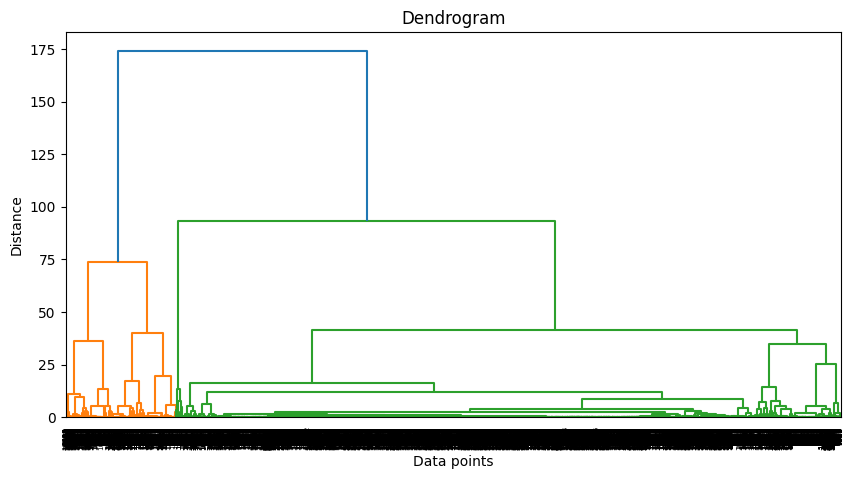

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
Z = linkage(x, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

In [28]:
# Cluster performance of Hierarchical

# Calculate the Silhouette Score
silhouette = silhouette_score(x, cluster.labels_)

# Calculate the Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(x, cluster.labels_)

# Calculate the Variance Ratio Criterion (Calinski-Harabasz Index)
calinski_harabasz = calinski_harabasz_score(x, cluster.labels_)

print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Silhouette Score: 0.814136225090953
Davies-Bouldin Index: 0.48278420458129073
Calinski-Harabasz Index: 17748.57399767544


#### Performance metrics
* Silhouette Score: The silhouette score is higher for Hierarchical indicate a good cluster.

* Davies-Bouldin Index: The index is lower for DBSCAN, indicate a good cluster.  

* Calinski-Harabasz Index (Variance Ratio Criterion): The index is higher for DBSCAN indicate a good cluster.

#### Question and Answers:
1. The reason why you chose the clustering algorithm(s): 
* I choose the DBSCAN because it can identify clusters of arbitrary shapes and insensitive to outliers.
* I choose the Hierarchical because it can handle clusters of varying shapes and size. 
2. Any pre-processing of the data or any hyperparameter settings
* I use StandardScaler to standardize data before fit. 
* For DBSCAN, I choose my eps by trying. Ideal eps is difficult to get right.
* For Hierarchical, I choose the k according to the dendrogram.
3. Output from the algorithm(s) -- show what clusters were generated
* Please see the figures above.  
4. The metrics you used to evaluate the output. What kind of performance did you get from that algorithm? Is that what you expected
* The performance metrics was showed above, it is not same as my expactation. 
* Since DBSCAN handle outlier better, so I expect DBSCAN out perform Hierarchical in this dataset, but the result I get from performance metrics indicate Hierarchical is better. I guess that is because the shape of the clusters. 

# Extend K-Means (optional)

see cluster.py

In [29]:
# test 
from sklearn.datasets import make_blobs
import pandas as pd
X, cluster_assignments = make_blobs(n_samples=700, centers=4, cluster_std=0.60, random_state=0)
df = pd.DataFrame(X)
df.columns = ['First', 'Second']
df

,First,Second
0,-0.841778,7.866552
1,-1.215153,8.014846
2,1.843208,-0.072221
3,-1.352334,7.529442
4,1.773949,-0.423201
...,...,...
695,-1.353432,3.165605
696,-0.973870,8.412865
697,-1.831415,2.286754
698,-1.846398,3.304915


Original cluster:  [94, 81, 348, 177]
Remove the out points for the large cluster:  [94, 81, 175, 175]
Redistribute the removed points to the small cluster:  [181, 169, 175, 175]


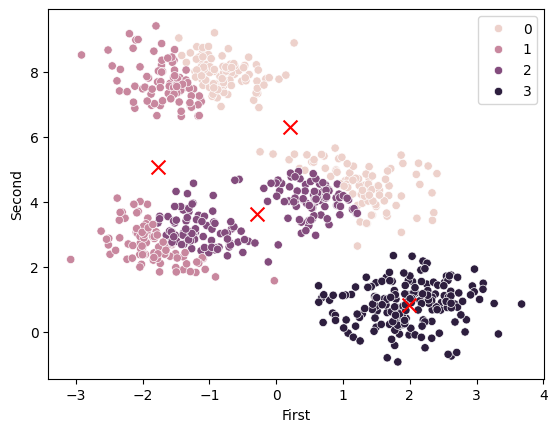

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from cluster import cluster

my_kmeans = cluster(4,1000)
my_cluster_hypotheses, centroids = my_kmeans.fit(X, True)

sns.scatterplot(data=df, x=df.iloc[:,0], y=df.iloc[:,1], hue=my_cluster_hypotheses)

# Plot the centroids
plt.scatter([centroid[0] for centroid in centroids], [centroid[1] for centroid in centroids], marker='x', color='red', s=100)

plt.show()

### Notes:
This is the wrong cluster done by the Kmeans when the initial centroids are not well choosed. 
But this could demonstrate my balancing algorithem. 
<br>My balance algorithm, move the points in large clusters(those points far from centroid), to the nearst small clusters. 